### Impoort libraries

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

In [2]:
# Create the bipartite graph using the provided code
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]
# Print the biadjacency matrix
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


In [3]:
# Project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [4]:
W_weighted = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W_weighted.degree(w, weight='weight')} {w}")


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


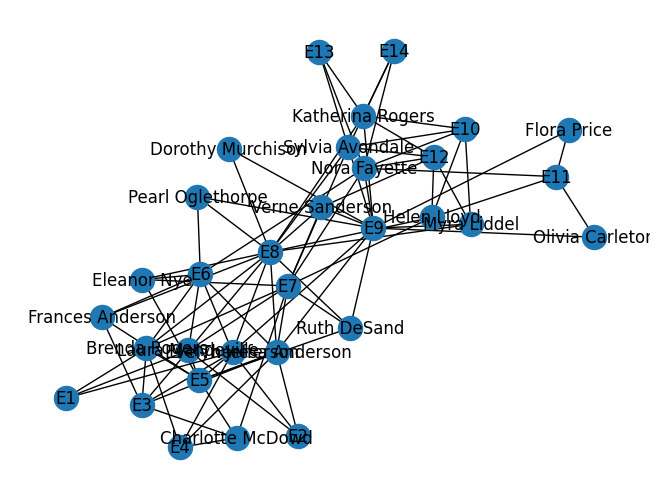

In [5]:
# Draw the bipartite graph
pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos, with_labels=True)
plt.show()

In [7]:
# Finding communities among women
from networkx.algorithms.community import greedy_modularity_communities

communities = greedy_modularity_communities(W)
women_communities = [list(community) for community in communities]

# Project the graph onto events
E = bipartite.projected_graph(G, clubs)

# Print the findings
print("Women Communities:")
for i, community in enumerate(women_communities):
    print(f"Community {i + 1}: {community}")

print("\nEvent Degrees:")
event_degrees = {event: E.degree(event) for event in clubs}
for event, degree in event_degrees.items():
    print(f"{event}: {degree}")


Women Communities:
Community 1: ['Helen Lloyd', 'Pearl Oglethorpe', 'Flora Price', 'Ruth DeSand', 'Myra Liddel', 'Sylvia Avondale', 'Katherina Rogers', 'Theresa Anderson', 'Dorothy Murchison', 'Nora Fayette', 'Olivia Carleton', 'Evelyn Jefferson']
Community 2: ['Verne Sanderson', 'Charlotte McDowd', 'Brenda Rogers', 'Frances Anderson', 'Eleanor Nye', 'Laura Mandeville']

Event Degrees:
E1: 8
E2: 8
E3: 8
E4: 8
E5: 8
E6: 13
E7: 13
E8: 13
E9: 13
E10: 8
E11: 8
E12: 8
E13: 8
E14: 8


### Analysis of the Southern Women Network

#### Communities Among Women

The analysis of the Davis Southern Women network revealed two distinct communities among the women based on their attendance at various social events:

- **Community 1**:
  - Members: Helen Lloyd, Pearl Oglethorpe, Flora Price, Ruth DeSand, Myra Liddel, Sylvia Avondale, Katherina Rogers, Theresa Anderson, Dorothy Murchison, Nora Fayette, Olivia Carleton, Evelyn Jefferson
- **Community 2**:
  - Members: Verne Sanderson, Charlotte McDowd, Brenda Rogers, Frances Anderson, Eleanor Nye, Laura Mandeville

The community detection algorithm identified these groups of women who frequently attended the same events, indicating strong social ties within each group.

The degree of each event indicates how many women attended that event. Events with higher degrees are more central and indicate a larger attendance, which might suggest these events were more popular or significant in the social network.

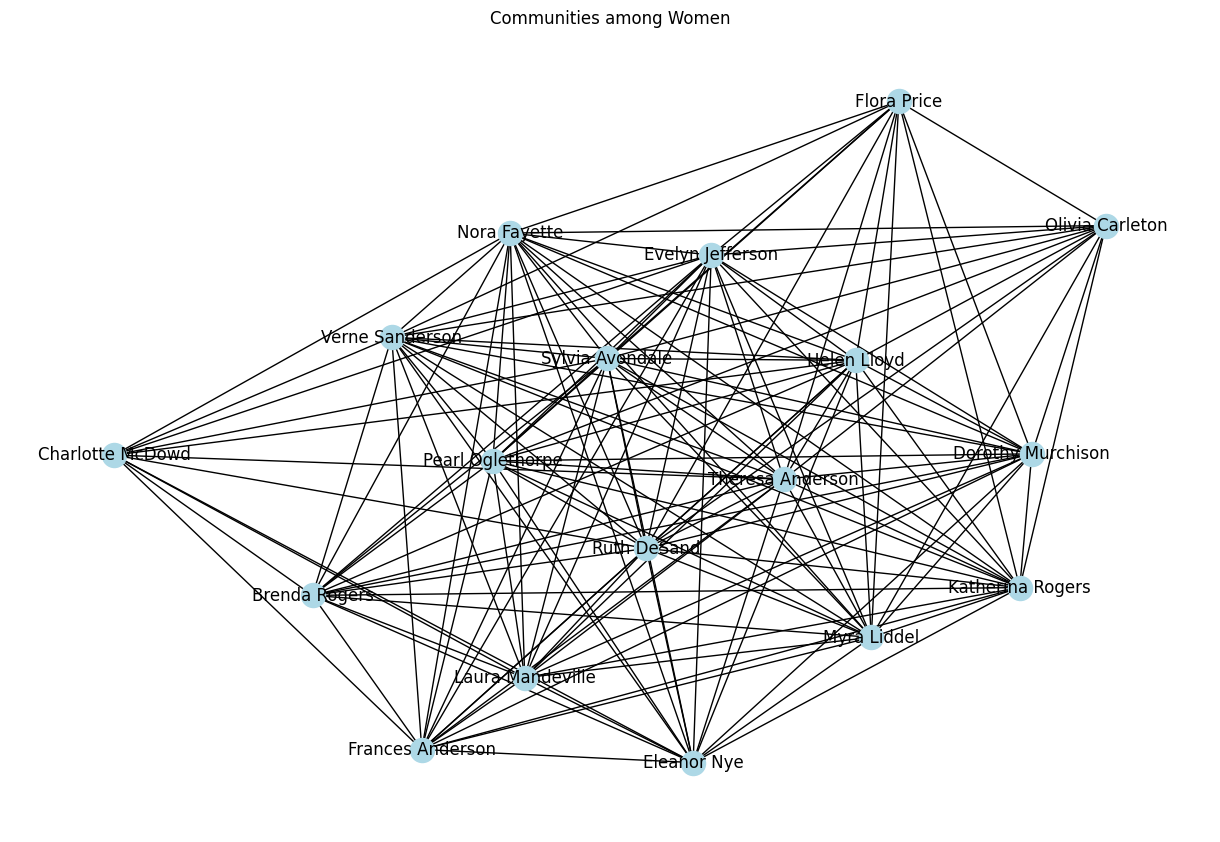

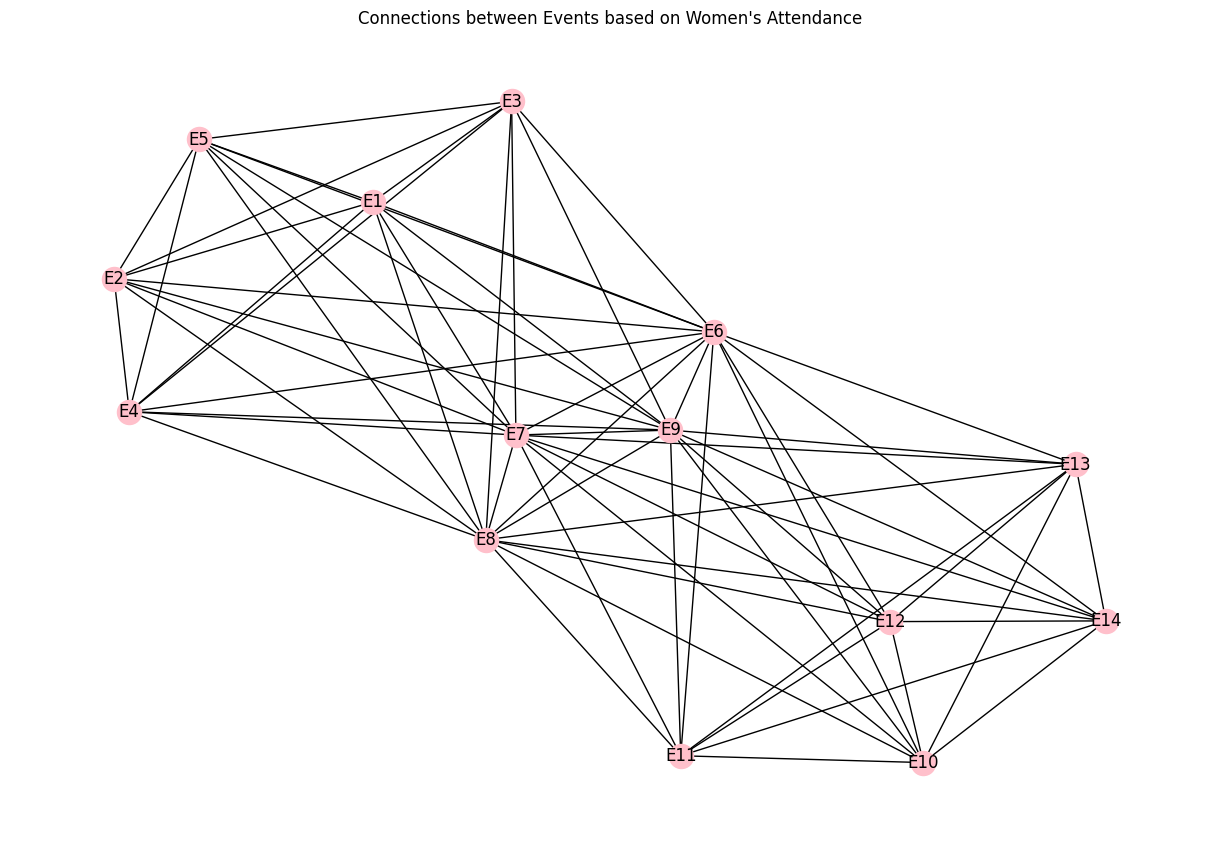

In [8]:
# women's community graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(W)
nx.draw(W, pos, with_labels=True, node_color='lightblue')
plt.title('Communities among Women')
plt.show()

# the events' graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(E)
nx.draw(E, pos, with_labels=True, node_color='pink')
plt.title('Connections between Events based on Women\'s Attendance')
plt.show()

#### Communities Among Women

As you can see, the graph shows two distinct communities among the women based on their attendance at social events.

#### Event Degrees

The event graph indicates the centrality of events based on women's attendance, with some events being significantly more central than others.